# Libro de descarga de la base de datos
Este libro ejecuta los comandos de descarga, y transforma el conjunto de datos en un .csv para tratarlos posteriormente. Se resalta la importancia de exportar la funciones guardas dentro de la carpeta biblio_herramientas, dado que contiene funciones que se usaran en todos los libros de manera repetida.

In [4]:
from traffic.data import opensky,nm_airspaces # se importan los recursos que se van a usar
                                              # de la librería
from biblio_herramienta.herramienta import *
from biblio_herramienta.tratardatos import *
carpeta_datos_csv = r"datos_sectores/"  # nombre de la carpeta donde van a guardarse los datos

# 1. Representación del espacio aéreo elegido
El espacio aéreo elegido es el sector LECMBLU, que se encuenta sobre Bilbao ( País Vasco). A continuación, se va a representar sobre la penínusla Ibérica para dar una idea general de su extensión

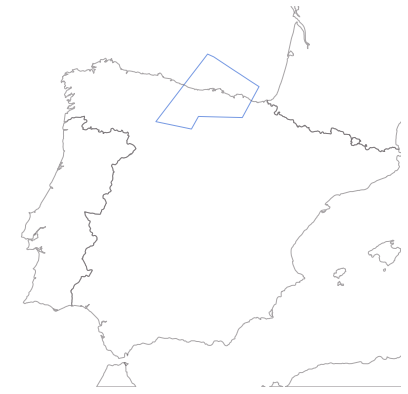

In [9]:
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP
from traffic.drawing import countries
with plt.style.context("traffic"):
        fig, ax = plt.subplots(
            subplot_kw=dict(projection=EuroPP()))
        nm_airspaces['LECMBLU'].plot(ax,alpha = 1)
        ax.add_feature(countries())
        ax.set_extent((-9, 3, 30, 45))
guardarimagen("descarga_bilbao","sector.png")    

# 2. Obtención de los datos del sector desde OpenSky
Se descarga los datos del periodo de días elegido en el sector elegido, y se guardan en formato .csv . Se guardan los datos porque la descarga llevo mucho más tiempo que cargarlos directamente desde un archivo

In [ ]:
vuelos = opensky.history(
    "2019-02-05", # fecha de inicia
    "2019-02-08", # fecha de parada
    # stop is implicit, i.e. stop="2017-02-06"
    return_flight=True, # define la clase de estructura en función de lo que se necesita
    bounds= nm_airspaces['LECMBLU'] # area de descarga de los datos
)    
guardarcsv(vuelos,"datos_bilbao")

# 2.1 Parámetros de los datos
Se describe los datos descargados de varias maneras

In [12]:
vuelos.data.head() # primeras filas de los datos

,alert,altitude,callsign,geoaltitude,groundspeed,hour,icao24,last_position,latitude,longitude,onground,spi,squawk,timestamp,track,vertical_rate
0,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:19.800000+00:00,42.334791,-3.236176,False,False,5337,2019-02-05 02:10:20+00:00,11.654737,0.0
1,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:20.831000064+00:00,42.336467,-3.235665,False,False,5337,2019-02-05 02:10:21+00:00,11.654737,0.0
2,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:20.831000064+00:00,42.336467,-3.235665,False,False,5337,2019-02-05 02:10:22+00:00,11.654737,0.0
3,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:22.258999808+00:00,42.338376,-3.235154,False,False,5337,2019-02-05 02:10:23+00:00,11.654737,0.0
4,False,36000.0,FPO1364,NaN,391.0,2019-02-05 02:00:00+00:00,396668,2019-02-05 02:10:22.258999808+00:00,42.338376,-3.235154,False,False,5337,2019-02-05 02:10:24+00:00,11.654737,0.0


In [17]:
vuelos.data.describe() # descripción de los datos obtenidos

,altitude,geoaltitude,groundspeed,latitude,longitude,track,vertical_rate
count,2.066834e+06,1.960798e+06,2.096080e+06,2.111087e+06,2.111087e+06,2.096080e+06,2.096922e+06
mean,3.227843e+04,3.284019e+04,4.029415e+02,4.320900e+01,-3.652308e+00,1.390450e+02,2.075362e+01
std,1.039880e+04,9.970326e+03,8.792732e+01,5.719556e-01,9.562478e-01,1.137691e+02,7.952514e+02
min,-1.000000e+03,-5.250000e+02,4.800000e+01,4.233334e+01,-5.677497e+00,0.000000e+00,-6.208000e+03
25%,3.330000e+04,3.410000e+04,3.990000e+02,4.270290e+01,-4.416632e+00,2.438013e+01,0.000000e+00
50%,3.600000e+04,3.657500e+04,4.250000e+02,4.318776e+01,-3.748692e+00,1.374091e+02,0.000000e+00
75%,3.800000e+04,3.815000e+04,4.540000e+02,4.365159e+01,-2.802600e+00,2.141556e+02,0.000000e+00
max,1.267000e+05,1.261000e+05,1.025000e+03,4.437583e+01,-2.165840e+00,3.598828e+02,3.264000e+04


In [3]:
vuelos.data.icao24.nunique() # numero de aeroanves distitnas dentro de los datos descargados

235

# 3. Representación de las trayectorias sobre el sector
En la siguiente celda se representa las trayetorias de los vuelos sobre el sector elegido. Para poder representarlo necesitamos recargar los datos desde el .csv, esto es debido a que la descarga de datos directa no respeta los formatos de las variables de tiempo, y no permite su representación sin haber realiazado un cambio previo. Este cambio de variable lo introduce la funcion  
```cargardatos(carpeta_datos,nombre_datos)```

In [20]:
vuelos = cargardatos(r"datos_sectores/","datos_bilbao.csv")

In [21]:
vuelos.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111087 entries, 0 to 2111086
Data columns (total 17 columns):
 #   Column         Dtype              
---  ------         -----              
 0   Unnamed: 0     int64              
 1   alert          bool               
 2   altitude       float64            
 3   callsign       object             
 4   geoaltitude    float64            
 5   groundspeed    float64            
 6   hour           datetime64[ns, UTC]
 7   icao24         object             
 8   last_position  datetime64[ns, UTC]
 9   latitude       float64            
 10  longitude      float64            
 11  onground       bool               
 12  spi            bool               
 13  squawk         float64            
 14  timestamp      datetime64[ns, UTC]
 15  track          float64            
 16  vertical_rate  float64            
dtypes: bool(3), datetime64[ns, UTC](3), float64(8), int64(1), object(2)
memory usage: 231.5+ MB


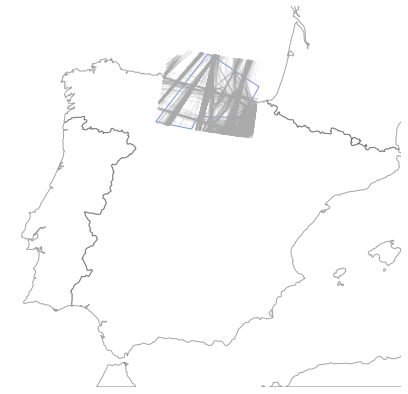

In [23]:
import matplotlib.pyplot as plt
from traffic.core.projection import EuroPP
from traffic.drawing import countries
with plt.style.context("traffic"):
        fig, ax = plt.subplots(
            subplot_kw=dict(projection=EuroPP()))
        nm_airspaces['LECMBLU'].plot(ax,alpha = 1)
        ax.add_feature(countries())
        ax.set_extent((-9, 3, 30, 45))
        vuelos.plot(ax, alpha = 0.2)
guardarimagen("descarga_bilbao","sector_con_vuelos.png")    